In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
heart = pd.read_csv('/Users/kaarunyalakshmanchinthalapudi/Downloads/heart_cleveland_upload.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [3]:
#spilt the data into 3 parts (testing, validation, testing)
#method-1: write my own code to split the data into 2 sets: Training set (80%), testing set (20%)
#method-2: train_test_split: 2 sets (training, testing)
#method-3: StratifiedShufflesplit: 2 sets (training, testing)

In [4]:
len(heart)


297

In [5]:
#method-1: write my own code to split the data into 2 sets: Training set (80%), testing set (20%)
def choose_test(data, test_per):
    shuffle = np.random.permutation(len(data))
    test = int(len(heart) * test_per)
    print(test)
    shuffle_index = shuffle[0:test]
    print("test",shuffle_index,sep=' -->>>')
    test_index = shuffle[test:]
    print("train",test_index, sep='--->>>')
    return data.iloc[shuffle_index], data.iloc[test_index]
train_set, test_set = choose_test(heart,0.2)
train_set, val_set = choose_test(train_set,0.1)
train_set

59
test -->>>[165 286   8 118 185 266 284  88  28  81 202 179 193 112 267  71 151 240
 279  82 270 168 242 152 171 113 209  54 195  70 264 167  75 161 225  63
 273  14 173  95 146 276 238  64 231  32 190 110 224  16 285 222 135  27
  11  99 102 197  65]
train--->>>[217   9 277  60  40 259 229 187 104 123 125 213 122  76  52 175  48 127
 144 159 191 292  29  59 129 272 226  84   7 196   2  15 153 263  80 215
 204 206 134 141 156  33 282 181 199  25 214  45 117 208 219 119   0 257
 143 203  22  94  37  85 160 289  61   5 252 221 116  21  97 239 291  20
 108 246 247 177 228   4  87  31 158 139 278 249  50  58  47 126 149 220
 128 120 169 145  74 155  68  67  35 294 251 100 148 184 262 212 205  96
 188 115 210 163 253 244 137  69  57 172 248  24 211 256 271 216 157  39
   6  78 275 245  36 182 293 295 283  93  12  73 105  17 176 243 164 233
 142  38 274   1 150 178 180  79  51 121  83 269 107  18 114  49   3 186
 183 192 281 241 136  26  42 287 218 200 261 296 232 255 230 223  34 166
 170 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
231,57,0,3,120,354,0,0,163,1,0.6,0,0,0,0
224,57,1,3,150,276,0,2,112,1,0.6,1,1,1,1
110,54,0,2,135,304,1,0,170,0,0.0,0,0,0,0
165,67,0,3,106,223,0,0,142,0,0.3,0,2,0,0
71,29,1,1,130,204,0,2,202,0,0.0,0,0,0,0
112,54,0,2,108,267,0,2,167,0,0.0,0,0,0,0
32,58,0,1,136,319,1,2,152,0,0.0,0,2,0,1
264,50,1,3,144,200,0,2,126,1,0.9,1,0,2,1
284,43,1,3,115,303,0,0,181,0,1.2,1,0,0,0
118,51,1,2,100,222,0,0,143,1,1.2,1,0,0,0


In [6]:
val_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
179,63,1,3,130,254,0,2,147,0,1.4,1,1,2,1
95,60,0,2,120,178,1,0,96,0,0.0,0,0,0,0
197,61,1,3,148,203,0,0,161,0,0.0,0,1,2,1
225,57,1,3,165,289,1,2,124,0,1.0,1,3,2,1
202,60,1,3,140,293,0,2,170,0,1.2,1,2,2,1
81,67,0,2,152,277,0,0,172,0,0.0,0,1,0,0
151,39,1,2,140,321,0,2,182,0,0.0,0,0,0,0
185,62,0,3,140,268,0,2,160,0,3.6,2,2,0,1
146,42,1,2,130,180,0,0,150,0,0.0,0,0,0,0
266,49,0,3,130,269,0,0,163,0,0.0,0,0,0,0


In [7]:
#method-2: train_test_split: 2 sets (training, testing)

In [8]:
train_set, test_set = train_test_split(heart, test_size=0.2, random_state = 31)
train_set, val_set = train_test_split(heart, test_size=0.1, random_state = 12)
train_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
137,44,0,2,108,141,0,0,175,0,0.6,1,0,0,0
11,59,1,0,160,273,0,2,125,0,0.0,0,0,0,1
191,62,0,3,124,209,0,0,163,0,0.0,0,0,0,0
111,54,1,2,150,232,0,2,165,0,1.6,0,0,2,0
186,62,0,3,160,164,0,2,145,0,6.2,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,51,0,3,130,305,0,0,142,1,1.2,1,0,2,1
130,48,0,2,130,275,0,0,139,0,0.2,0,0,0,0
241,55,1,3,160,289,0,2,145,1,0.8,1,1,2,1
253,53,0,3,138,234,0,2,160,0,0.0,0,0,0,0


In [9]:
val_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
221,58,1,3,125,300,0,2,171,0,0.0,0,2,2,1
135,46,0,2,142,177,0,2,160,1,1.4,2,0,0,0
67,41,0,1,126,306,0,0,163,0,0.0,0,0,0,0
159,68,1,3,144,193,1,0,141,0,3.4,1,2,2,1
210,59,1,3,164,176,1,2,90,0,1.0,1,2,1,1
77,68,0,2,120,211,0,2,115,0,1.5,1,0,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
145,42,0,2,120,209,0,0,173,0,0.0,1,0,0,0
189,62,0,3,138,294,1,0,106,0,1.9,1,3,0,1
169,66,1,3,160,228,0,2,138,0,2.3,0,0,1,0


In [10]:
train_set, test_set = choose_test(heart,0.2)
train_set, val_set = choose_test(train_set,0.1)
train_set

59
test -->>>[224  36 275  58  89  76  42   2 263 228   7 191 169 110 279  33  55 253
  71  44 268 255  53  25 247  13 130  78  75 187 106   3 188  30  95  66
 196  50 122  12 244 289 198 243  94 119 181 173 225 220 251 154  16 153
  61 138  10 118  77]
train--->>>[ 90 159 132 254  47  59  20   9  98  40  48 178 264 164 245  31  17 126
 150 113 252  67  63  49 176 293 217   4  54  80 133 131 294 257 180  97
 209 230 108 174 215 271 120  60 227 266   8 112  72 104  82 136  74 273
 201 200 151  57 288 128 267  21 272 258 190  18 259 265 140 141 240  51
 162 182 194 114 100  99 166  35  34 237 226 139 222 175 281  37 137  39
   1  27 296 203  26 148  96  73 192 146 202 125 212  83 290  88 248 129
  24 109 165  46 189  92 261 295 216  43 197 167 127 184 219 210 107  62
 223  15 260 291  85  19 183 102 285  52  87  86 149 287 172 103 124  45
 236 111  79  28 256 286  84  14 207 156   6 211 284 204 205 152 276 246
  65 280 123  56 232 115 242  68 239 218 105  11 292 238 185 143 163 168
 250 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
169,66,1,3,160,228,0,2,138,0,2.3,0,0,1,0
220,58,1,3,150,270,0,2,111,1,0.8,0,0,2,1
119,51,1,2,125,245,1,2,166,0,2.4,1,0,0,0
225,57,1,3,165,289,1,2,124,0,1.0,1,3,2,1
12,59,1,0,134,204,0,0,162,0,0.8,0,2,0,1
53,48,1,1,130,245,0,2,180,0,0.2,1,0,0,0
36,56,1,1,120,240,0,0,169,0,0.0,2,0,0,0
153,37,1,2,130,250,0,0,187,0,3.5,2,0,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
13,58,0,0,150,283,1,2,162,0,1.0,0,0,0,0


In [11]:
#METHOD - 3 STRATIFIED METHOD

In [12]:
strat_shuffle = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state= 9)
result = strat_shuffle.split(heart, heart['oldpeak'])
result

for test_index , shuffle_index in result:
    train_set = heart.loc[test_index ]
    test_set = heart.loc[shuffle_index]

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
 #The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [13]:
bins = pd.Series([0,100,110,120,130,140,150,160])
labels = ['very low', 'low', 'avg' ,'good',' very good','excenllent','outstanding']
heart['more_obserevation'] = pd.cut(heart['trestbps'],bins=bins ,labels=labels)
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition,more_obserevation
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0,outstanding
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0,very good
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0,excenllent
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1,very good
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1,outstanding
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1,avg
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1,avg
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0,very good


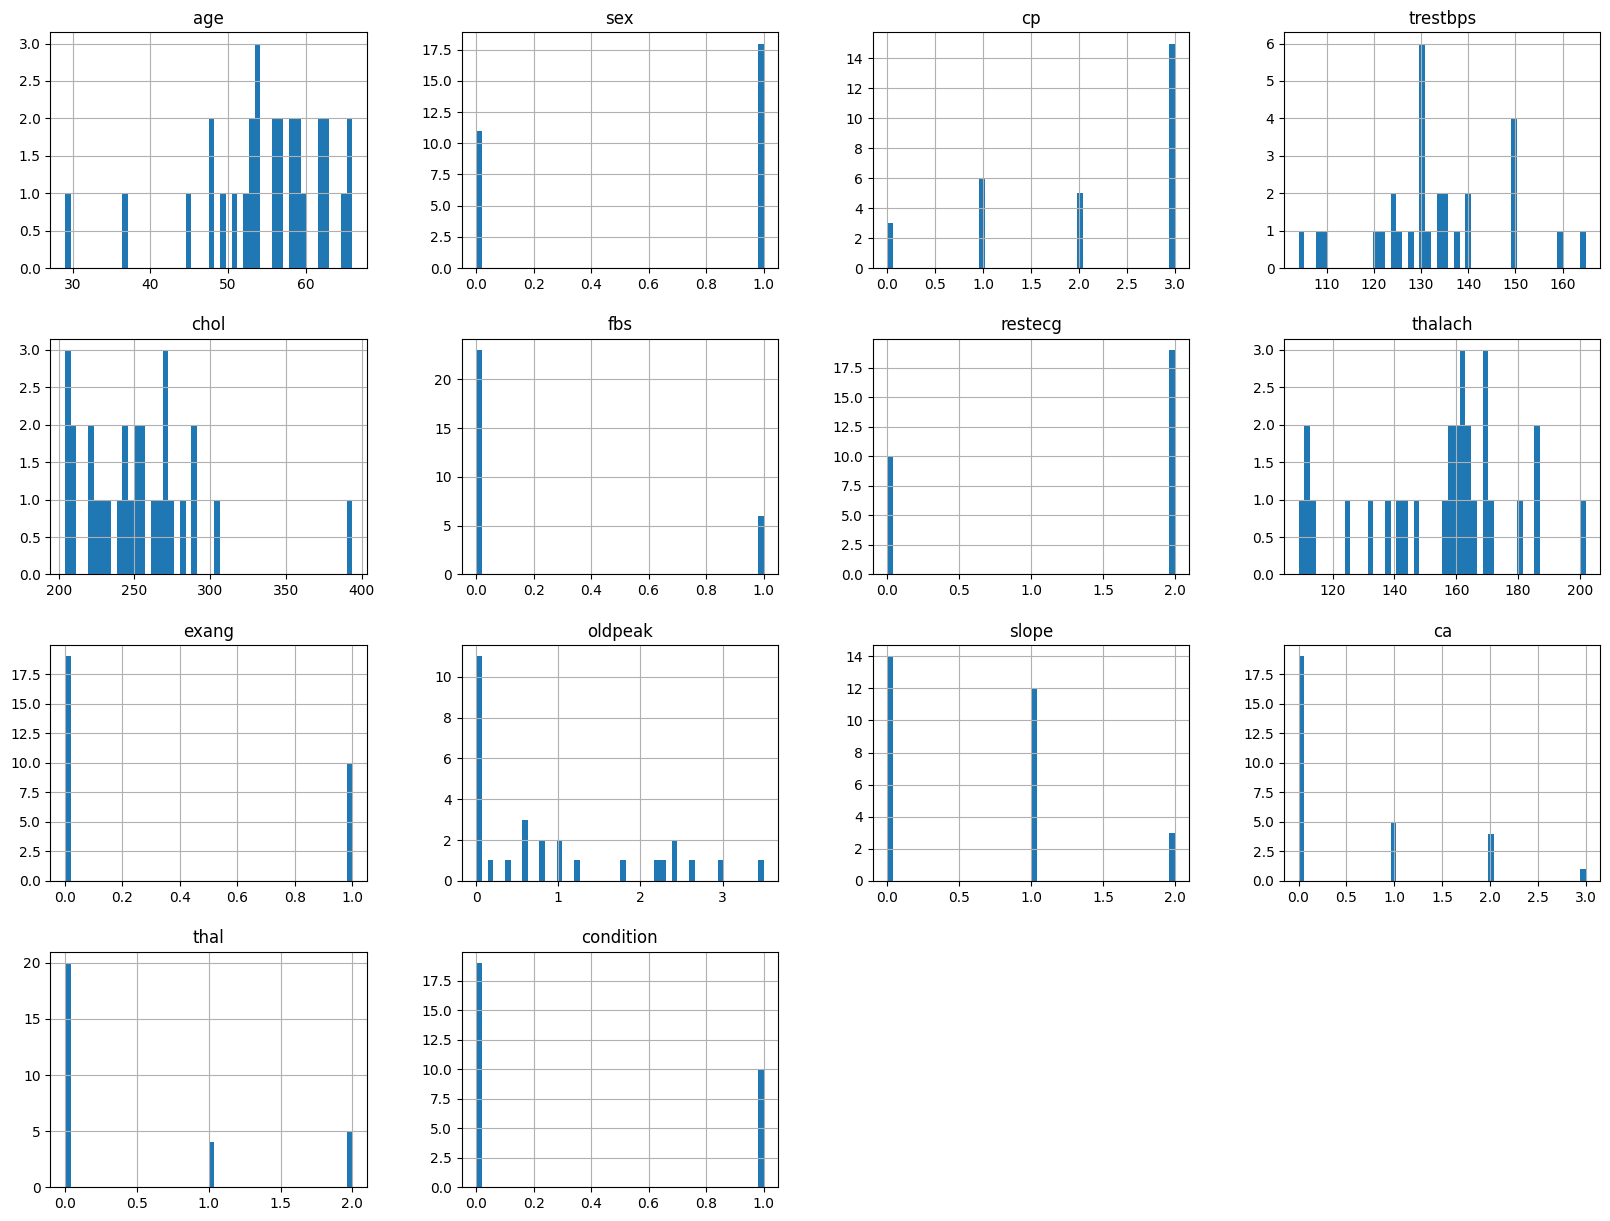

In [14]:
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#sometimes the machine or the developer will take the base value for every instance to simplify his work he will do (value capping)
#that is why some